In [1]:
import numpy as np
from utilitiesDOS import read_dump, calculate_fft, calculate_autocorr

### Import LAMMPS velocities

In [2]:
path_to_file = "LAMMPS-input/dump.lammpsvel"
velocities, n_atoms, n_frames, n_columns, printing_period = read_dump(path_to_file)
print("Shape of the velocities array =", np.shape(velocities))
print("Number of frames =", n_frames)
print("Number of particles =", n_atoms)

Shape of the velocities array = (850, 3, 2001)
Number of frames = 2001
Number of particles = 850


### Choose correlation length

In [4]:
correlation_len = n_frames // 4
print("Correlation length =", correlation_len)

Correlation length = 500


### Set timestep

In [8]:
dt = 2.32 # fs
min_dt = dt * printing_period # duration between two printed velocity
print("The velocities was printed every", min_dt, "fs")

The velocities was printed every 11.6 fs


### Calculate VACF

In [17]:
VACF_v, VACF_vx, VACF_vy, VACF_vz = np.zeros((4, correlation_len), dtype=float)
for i_time in range(correlation_len, n_frames, correlation_len):
    for i_atom in range(n_atoms):
        VACF_vx += calculate_autocorr(velocities[i_atom,0,i_time-correlation_len:i_time], len(VACF_vx))
        VACF_vy += calculate_autocorr(velocities[i_atom,1,i_time-correlation_len:i_time], len(VACF_vy))
        VACF_vz += calculate_autocorr(velocities[i_atom,2,i_time-correlation_len:i_time], len(VACF_vz))

In [30]:
vacf_xyz = np.zeros((3, correlation_len), dtype=float)
vacf = np.zeros((correlation_len), dtype=float)  
for i_time in range(correlation_len, n_frames, correlation_len):
    for i_atom in range(n_atoms):
        for i_dim in range(3):
            vacf_xyz[i_dim] += calculate_autocorr(velocities[i_atom, i_dim,i_time-correlation_len:i_time],
                                                   correlation_len)
for vxyz in vacf_xyz:
    vacf += vxyz
vacf /= vacf[0] # Normalise the velocity correlation

In [31]:
plt.loglog(vacf)

NameError: name 'plt' is not defined

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from utilitiesDOS import read_dump, calculate_fft, calculate_autocorr

In [9]:

#Ensemble average of correlation
blocks = range(corlen,total,corlen)
for t in blocks:
    for i in range(num_atoms):
        VACF_vx += autocorr(data[i,0,t-corlen:t], len(VACF_vx))
        VACF_vy += autocorr(data[i,1,t-corlen:t], len(VACF_vy))
        VACF_vz += autocorr(data[i,2,t-corlen:t], len(VACF_vz))
#Average of Vx,Vy,Vz and blocks 
TVACF_v += ((VACF_vx + VACF_vy + VACF_vz) / 3.00)
TVACF_norm = TVACF_v / TVACF_v[0]

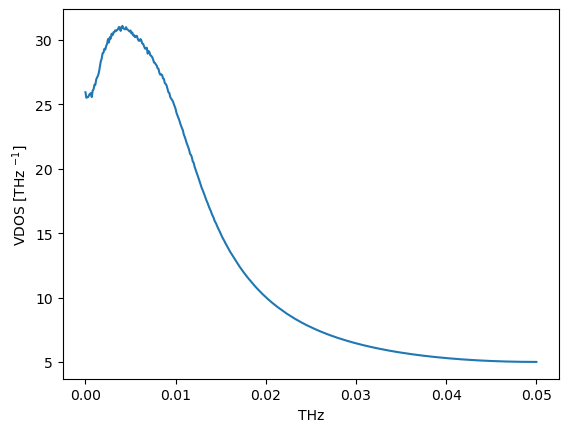

In [11]:
# plt.semilogx(TVACF_norm, '.')
dt = 10 # fs
# x = np.arange(corlen)*dt
#Write VACF to file
# f = open('VACF.dat','w')
# f.write('#Time(ps) Norm. I. (No Units) \n')
# for i in range(x.size):
#     f.write('%f %f \n' %(x[i],TVACF_norm[i]))
# f.close()

std = corlen/15.5
vsize = TVACF_v.size  
# np.lib.pad(TVACF_v,(0,vsize*15),'constant',constant_values=(0))
TVACF_v *= signal.get_window(('gaussian',std),vsize) 
fft_v = fft_autocorr(TVACF_norm,dt) # * 1.0E12 #THz^-1     
freq = np.fft.rfftfreq(vsize, d=dt) # / 1.0E12 #THz

plt.plot(freq,np.abs(fft_v))
plt.xlabel('THz')
plt.ylabel(r'VDOS [THz $^{-1}$]')
plt.show()


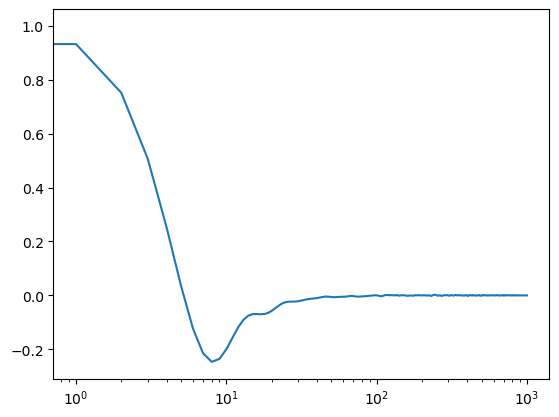

In [51]:
plt.semilogx(TVACF_norm)